In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Matrix between occurence of war in tweets and daily return on VIX

In [2]:
startingDays = [
              "2022-03-16T00:00:00Z",
              "2022-03-17T00:00:00Z",
              "2022-03-18T00:00:00Z",
              "2022-03-21T00:00:00Z",
              "2022-03-22T00:00:00Z",
]

In [3]:
warDf = pd.read_csv('war.csv', delimiter='␀', engine='python')
warDf.describe()

,text,date
count,766578,766578
unique,741473,5
top,Tigray is facing mass starvation induced by th...,2022-03-16T00:00:00Z
freq,1278,177226


In [4]:
vixDf = pd.read_csv('vix.csv', engine='python')
vixDf

,Open,High,Low,Close
0,29.020000,29.799999,26.290001,26.670000
1,26.510000,27.469999,25.250000,25.670000
2,26.360001,26.820000,23.850000,23.870001
3,25.139999,25.360001,22.990000,23.530001
4,24.020000,24.020000,22.700001,22.940001


In [5]:
for i in vixDf.index:
    vixDf.at[i, 'Daily Return']=vixDf.at[i, 'Close']-vixDf.at[i, 'Open'].astype(float)

In [6]:
march16 = warDf[warDf['date'] == "2022-03-16T00:00:00Z"]

In [7]:
warTweetCount = pd.DataFrame(columns=['war tweets', 'date', 'daily return'])
warTweetCount

,war tweets,date,daily return


In [8]:
lst = []
for i in range(len(startingDays)):
    count = len(warDf[warDf['date'] == startingDays[i]])
    warTweetCount.loc[i] = count, startingDays[i], vixDf.at[i, 'Daily Return']

In [9]:
warTweetCount

,war tweets,date,daily return
0,177226,2022-03-16T00:00:00Z,-2.350000
1,167322,2022-03-17T00:00:00Z,-0.840000
2,158344,2022-03-18T00:00:00Z,-2.490000
3,136425,2022-03-21T00:00:00Z,-1.609999
4,127261,2022-03-22T00:00:00Z,-1.080000


<AxesSubplot:>

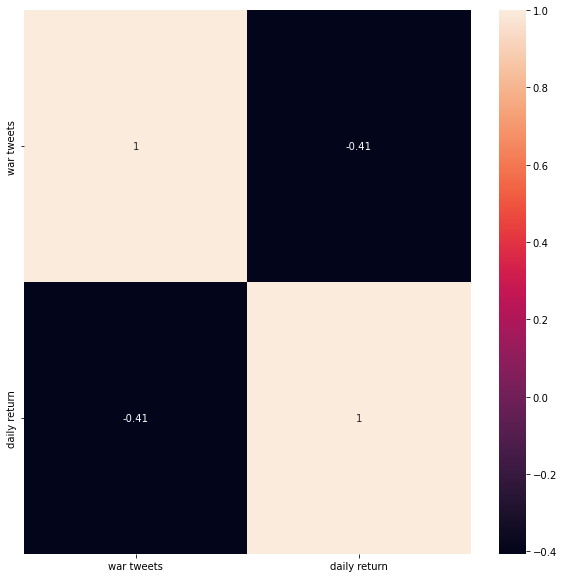

In [10]:
warTweetCount=warTweetCount.apply(lambda x: pd.to_numeric(x, errors='ignore'))
correlation_mat = warTweetCount.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_mat, annot = True)

# Finding the most used words in the war tweets

In [11]:
warDf.describe()

,text,date
count,766578,766578
unique,741473,5
top,Tigray is facing mass starvation induced by th...,2022-03-16T00:00:00Z
freq,1278,177226


In [99]:
import nltk
from nltk.corpus import stopwords
from collections import OrderedDict, defaultdict
import itertools

In [13]:
stop = stopwords.words('english')

In [61]:
stop.append('I')
stop.append('&amp;')
stop.append('-')
stop.append('|')
stop.append('The')
stop.append('A')
stop.append('Via')

In [82]:
topDailyOccurences = []
warDf["text"] = warDf["text"].str.replace('[^\w\s]','')
warDf["text"] = warDf["text"].str.lower()


warDf['text without stopwords'] = warDf['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
for i in range(len(startingDays)):
    daily = []
    dailyDf = warDf[warDf['date'] == startingDays[i]]
    daily.append(dailyDf['text without stopwords'].str.split(expand=True).stack().value_counts()[:20].to_dict())
    topDailyOccurences.append(daily)

C:\Users\cchri\AppData\Local\Temp/ipykernel_12396/2984813486.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  warDf["text"] = warDf["text"].str.replace('[^\w\s]','')


In [95]:
WordOccurenceDictTotal = topDailyOccurences[0][0]
for i in range(len(topDailyOccurences)-1):
    WordOccurenceDictTotal.update(topDailyOccurences[i][0])

In [100]:
#Determining what words to use.
dict(itertools.islice(WordOccurenceDictTotal.items(), 10))

{'war': 127718,
 'ukraine': 40671,
 'russia': 18454,
 'putin': 12566,
 'russian': 11895,
 'us': 8895,
 'amp': 11513,
 'world': 10964,
 'people': 9160,
 'criminal': 10557}

In [101]:
listOfWords = ['war', 'ukraine', 'russia', 'putin', 'russian', 'us', 'amp', 'world', 'people', 'criminal']

In [106]:
topDailyOccurences = []
warDf["text"] = warDf["text"].str.replace('[^\w\s]','')
warDf["text"] = warDf["text"].str.lower()

warDf['text without stopwords'] = warDf['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
warDf['text without stopwords'] = warDf['text without stopwords'].apply(lambda x: ' '.join([word for word in x.split() if word in (listOfWords)]))
for i in range(len(startingDays)):
    daily = []
    dailyDf = warDf[warDf['date'] == startingDays[i]]
    daily.append(dailyDf['text without stopwords'].str.split(expand=True).stack().value_counts().to_dict())
    topDailyOccurences.append(daily)

C:\Users\cchri\AppData\Local\Temp/ipykernel_12396/204239142.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  warDf["text"] = warDf["text"].str.replace('[^\w\s]','')


In [107]:
topDailyOccurences

[[{'war': 168706,
   'ukraine': 50664,
   'russia': 25886,
   'putin': 22973,
   'russian': 15414,
   'us': 15140,
   'amp': 14931,
   'world': 13365,
   'people': 13177,
   'criminal': 9946}],
 [{'war': 156377,
   'ukraine': 49564,
   'russia': 23817,
   'putin': 21582,
   'russian': 14764,
   'world': 12995,
   'us': 12992,
   'people': 12832,
   'amp': 12528,
   'criminal': 10557}],
 [{'war': 145748,
   'ukraine': 46834,
   'russia': 20899,
   'putin': 16538,
   'amp': 14399,
   'russian': 13931,
   'people': 13610,
   'world': 13197,
   'us': 10799,
   'criminal': 4548}],
 [{'war': 127718,
   'ukraine': 40671,
   'russia': 18454,
   'putin': 12568,
   'russian': 11895,
   'amp': 11513,
   'world': 10964,
   'people': 9160,
   'us': 8895,
   'criminal': 3454}],
 [{'war': 119652,
   'ukraine': 36674,
   'russia': 16092,
   'amp': 11260,
   'russian': 10824,
   'putin': 9920,
   'us': 9770,
   'world': 9514,
   'people': 7528,
   'criminal': 3245}]]

In [110]:
sortedList = []
for i in range(len(topDailyOccurences)):
    sorted_dict = {key: value for key, value in sorted(topDailyOccurences[i][0].items())}
    sortedList.append(sorted_dict)

In [113]:
sortedDf = pd.DataFrame(sortedList)

In [114]:
sortedDf

,amp,criminal,people,putin,russia,russian,ukraine,us,war,world
0,14931,9946,13177,22973,25886,15414,50664,15140,168706,13365
1,12528,10557,12832,21582,23817,14764,49564,12992,156377,12995
2,14399,4548,13610,16538,20899,13931,46834,10799,145748,13197
3,11513,3454,9160,12568,18454,11895,40671,8895,127718,10964
4,11260,3245,7528,9920,16092,10824,36674,9770,119652,9514


In [115]:
for i in sortedDf.index:
    sortedDf.at[i, 'vix net effect']=vixDf.at[i, 'Daily Return']=vixDf.at[i, 'Close']-vixDf.at[i, 'Open'].astype(float)

In [116]:
sortedDf

,amp,criminal,people,putin,russia,russian,ukraine,us,war,world,vix net effect
0,14931,9946,13177,22973,25886,15414,50664,15140,168706,13365,-2.350000
1,12528,10557,12832,21582,23817,14764,49564,12992,156377,12995,-0.840000
2,14399,4548,13610,16538,20899,13931,46834,10799,145748,13197,-2.490000
3,11513,3454,9160,12568,18454,11895,40671,8895,127718,10964,-1.609999
4,11260,3245,7528,9920,16092,10824,36674,9770,119652,9514,-1.080000


<AxesSubplot:>

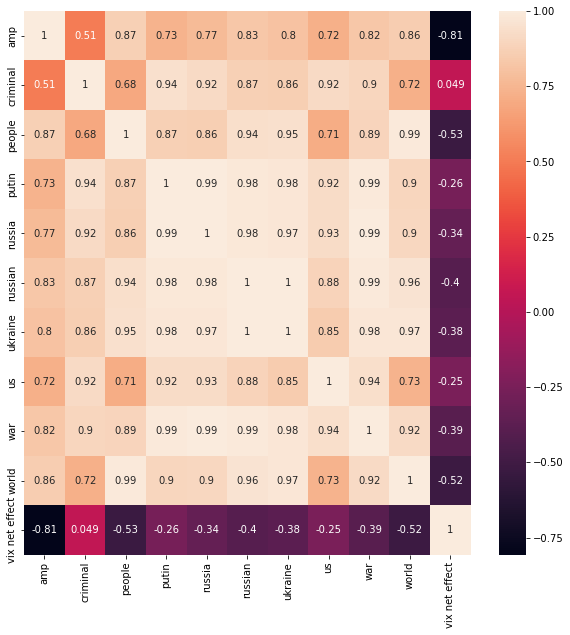

In [125]:
correlation_pearson = sortedDf.corr(method='pearson')

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_pearson, annot = True)

In [132]:
from scipy.stats import pearsonr

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [137]:
pvalues = calculate_pvalues(sortedDf)
pvalues

,amp,criminal,people,putin,russia,russian,ukraine,us,war,world,vix net effect
amp,0.0,0.3849,0.0561,0.1573,0.1271,0.0851,0.1005,0.1675,0.0861,0.0634,0.0988
criminal,0.3849,0.0,0.2041,0.0158,0.028,0.0545,0.0598,0.028,0.0389,0.1689,0.9379
people,0.0561,0.2041,0.0,0.0577,0.0614,0.017,0.0133,0.1833,0.0443,0.001,0.3621
putin,0.1573,0.0158,0.0577,0.0,0.0006,0.0027,0.0042,0.0245,0.0015,0.0372,0.6713
russia,0.1271,0.028,0.0614,0.0006,0.0,0.0031,0.0055,0.0231,0.0005,0.0365,0.5768
russian,0.0851,0.0545,0.017,0.0027,0.0031,0.0,0.0001,0.0482,0.0015,0.0086,0.5063
ukraine,0.1005,0.0598,0.0133,0.0042,0.0055,0.0001,0.0,0.0678,0.0043,0.0056,0.5274
us,0.1675,0.028,0.1833,0.0245,0.0231,0.0482,0.0678,0.0,0.0185,0.1599,0.6903
war,0.0861,0.0389,0.0443,0.0015,0.0005,0.0015,0.0043,0.0185,0.0,0.0283,0.5138
world,0.0634,0.1689,0.001,0.0372,0.0365,0.0086,0.0056,0.1599,0.0283,0.0,0.3675
